In [30]:
#cargar librerias necesarias para el analisis y visualizacion de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [20]:
# cargar datos de salud mental csv
df = pd.read_csv('/content/mental_health_dataset.csv')

In [21]:
# traducir el nombre de las variables a español

df.rename(columns={
    'Age': 'Edad',
    'Gender': 'Género',
    'employment_status': 'Estado de empleo',
    'work_environment': 'Ambiente de trabajo',
    'mental_health_history': 'Historial de salud mental',
    'seeks_treatment': 'Necesita tratamiento',
    'mental_health_risk': 'Riesgo para la salud mental',
    'stress_level': 'Nivel de estrés',
    'sleep_hours': 'Horas de sueño',
    'physical_activity_days': 'Días de actividad física',
    'depression_score': 'Puntaje de depresión',
    'anxiety_score': 'Puntaje de ansiedad',
    'social_support_score': 'Puntaje de soporte social',
    'productivity_score': 'Puntaje de productividad',


}, inplace=True)


In [22]:
# visualizar los datos
df.head()

,age,gender,Estado de empleo,Ambiente de trabajo,Historial de salud mental,Necesita tratamiento,Nivel de estrés,Horas de sueño,Días de actividad física,Puntaje de depresión,Puntaje de ansiedad,Puntaje de soporte social,Puntaje de productividad,Riesgo para la salud mental
0,56,Male,Employed,On-site,Yes,Yes,6,6.2,3,28,17,54,59.7,High
1,46,Female,Student,On-site,No,Yes,10,9.0,4,30,11,85,54.9,High
2,32,Female,Employed,On-site,Yes,No,7,7.7,2,24,7,62,61.3,Medium
3,60,Non-binary,Self-employed,On-site,No,No,4,4.5,4,6,0,95,97.0,Low
4,25,Female,Self-employed,On-site,Yes,Yes,3,5.4,0,24,12,70,69.0,High


In [23]:
# informacion de los datos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          10000 non-null  int64  
 1   gender                       10000 non-null  object 
 2   Estado de empleo             10000 non-null  object 
 3   Ambiente de trabajo          10000 non-null  object 
 4   Historial de salud mental    10000 non-null  object 
 5   Necesita tratamiento         10000 non-null  object 
 6   Nivel de estrés              10000 non-null  int64  
 7   Horas de sueño               10000 non-null  float64
 8   Días de actividad física     10000 non-null  int64  
 9   Puntaje de depresión         10000 non-null  int64  
 10  Puntaje de ansiedad          10000 non-null  int64  
 11  Puntaje de soporte social    10000 non-null  int64  
 12  Puntaje de productividad     10000 non-null  float64
 13  Riesgo para la sa

Analisis EDA

In [32]:
df.describe()

,age,Nivel de estrés,Horas de sueño,Días de actividad física,Puntaje de depresión,Puntaje de ansiedad,Puntaje de soporte social,Puntaje de productividad
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.557600,5.572000,6.473000,3.505700,15.039900,10.56180,50.117700,77.312210
std,13.749581,2.887741,1.473944,2.282737,8.990839,6.32264,29.229278,14.061202
min,18.000000,1.000000,3.000000,0.000000,0.000000,0.00000,0.000000,42.800000
25%,30.000000,3.000000,5.500000,2.000000,7.000000,5.00000,25.000000,65.800000
50%,41.500000,6.000000,6.500000,4.000000,15.000000,11.00000,50.000000,77.600000
75%,53.000000,8.000000,7.500000,5.000000,23.000000,16.00000,76.000000,89.200000
max,65.000000,10.000000,10.000000,7.000000,30.000000,21.00000,100.000000,100.000000


In [24]:
# verificar si se encuentran datos faltantes
df.isnull().sum()

,0
age,0
gender,0
Estado de empleo,0
Ambiente de trabajo,0
Historial de salud mental,0
Necesita tratamiento,0
Nivel de estrés,0
Horas de sueño,0
Días de actividad física,0
Puntaje de depresión,0


In [ ]:
# distribucion de clase de las variables objetivo
df['Riesgo para la salud mental'].value_counts()


,count
Riesgo para la salud mental,
Medium,5892
High,2369
Low,1739


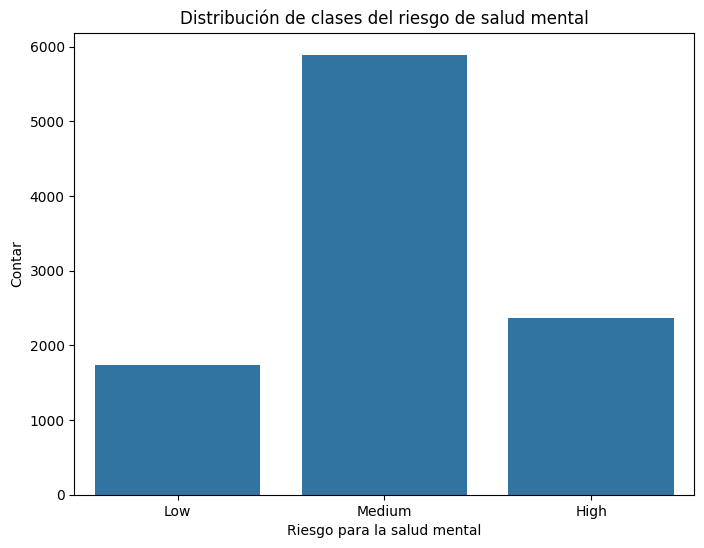

In [25]:
# visualizacion de la distribucion en grafico de varras
plt.figure(figsize=(8, 6))
sns.countplot(x='Riesgo para la salud mental', data=df, order=['Low', 'Medium', 'High'])
plt.title('Distribución de clases del riesgo de salud mental')
plt.xlabel('Riesgo para la salud mental')
plt.ylabel('Contar')
plt.show()

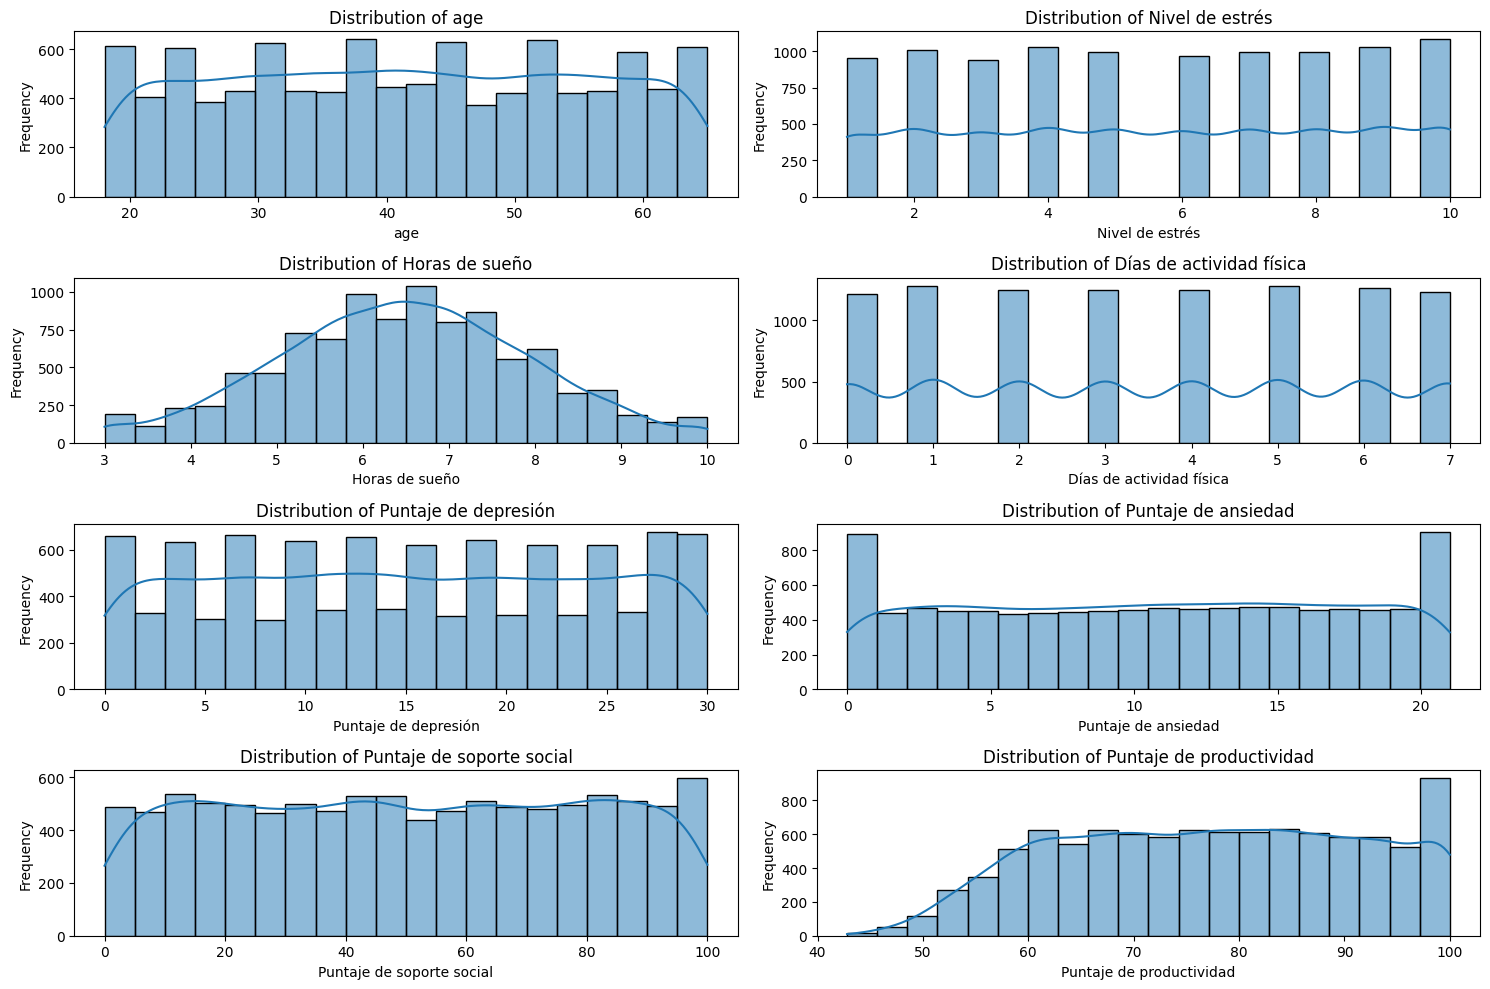

In [26]:
# visualizacion de la distribucion con caracteristicas numeriacas

num_cols = ['age', 'Nivel de estrés', 'Horas de sueño', 'Días de actividad física',
            'Puntaje de depresión', 'Puntaje de ansiedad', 'Puntaje de soporte social', 'Puntaje de productividad']
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


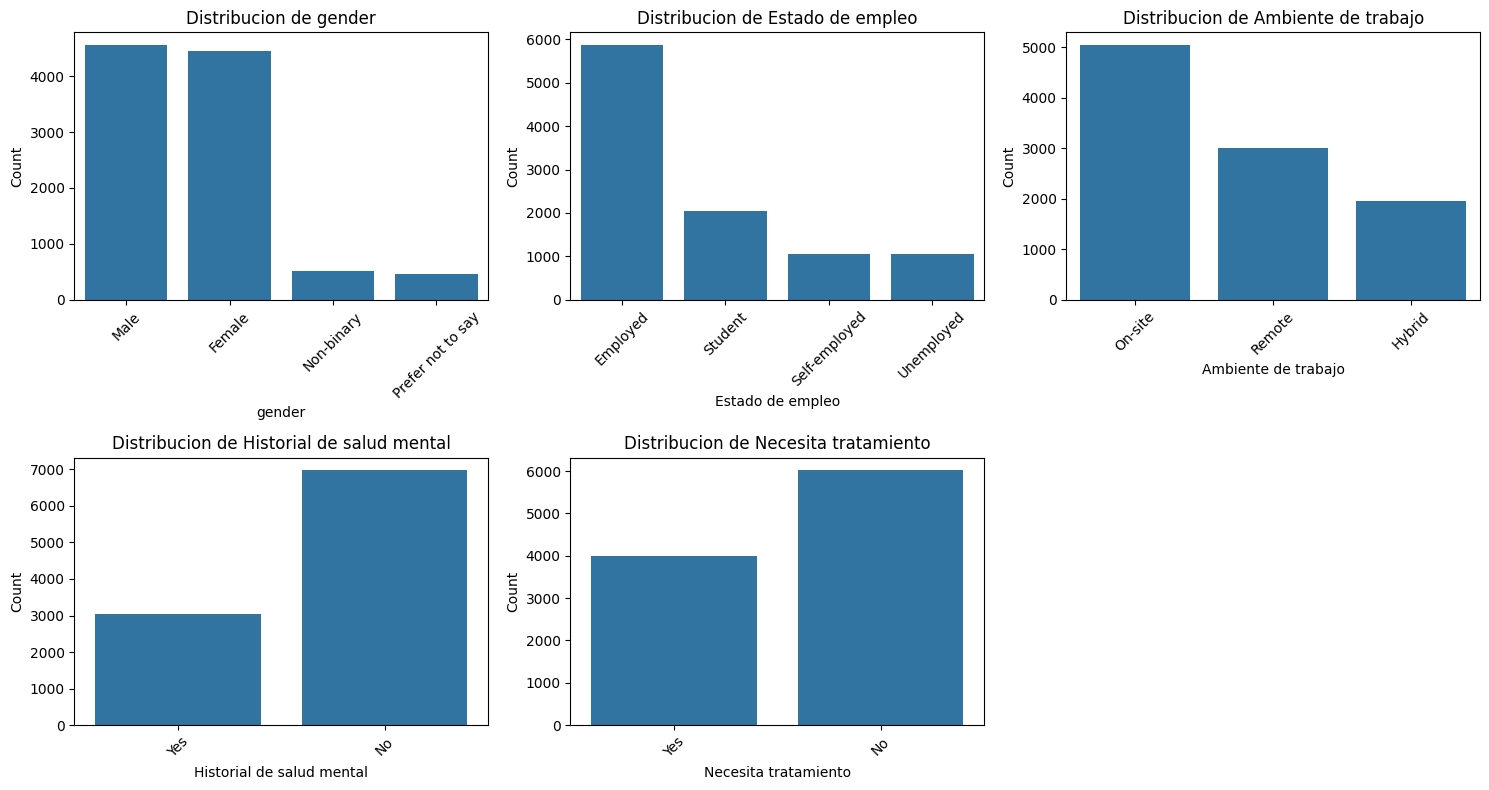

In [27]:
# Visualizar distribuciones de características categóricas
cat_cols = ['gender', 'Estado de empleo', 'Ambiente de trabajo', 'Historial de salud mental', 'Necesita tratamiento']
plt.figure(figsize=(15, 8))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribucion de {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


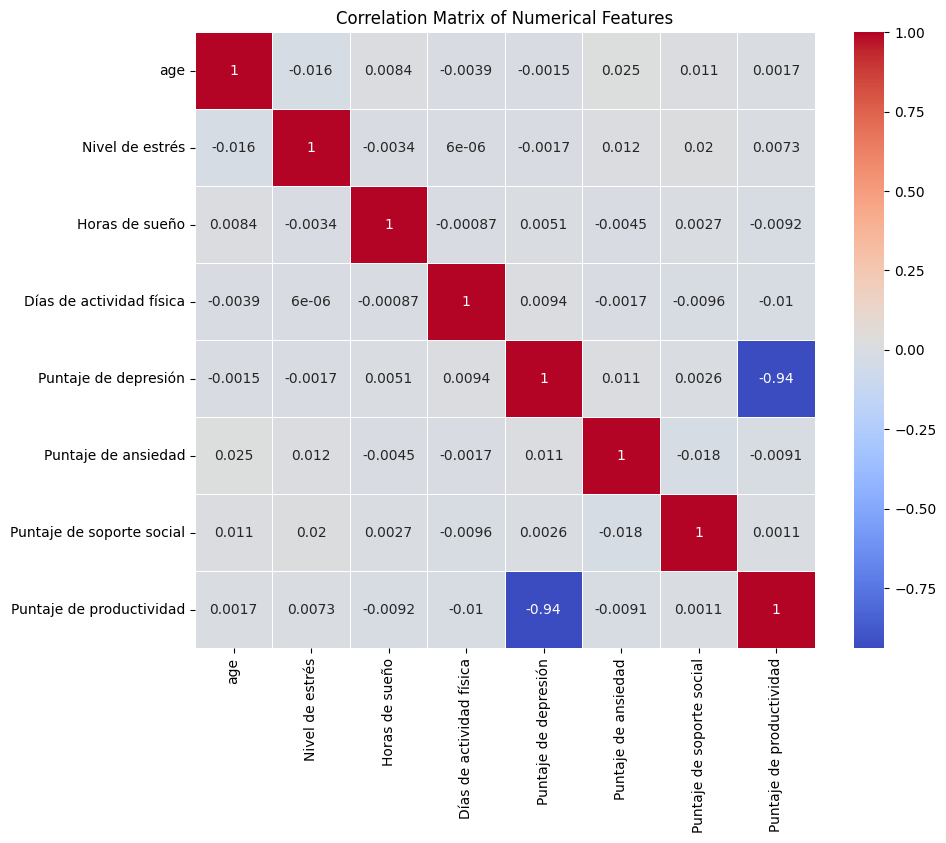

In [28]:
# Matriz de correlación para características numéricas
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

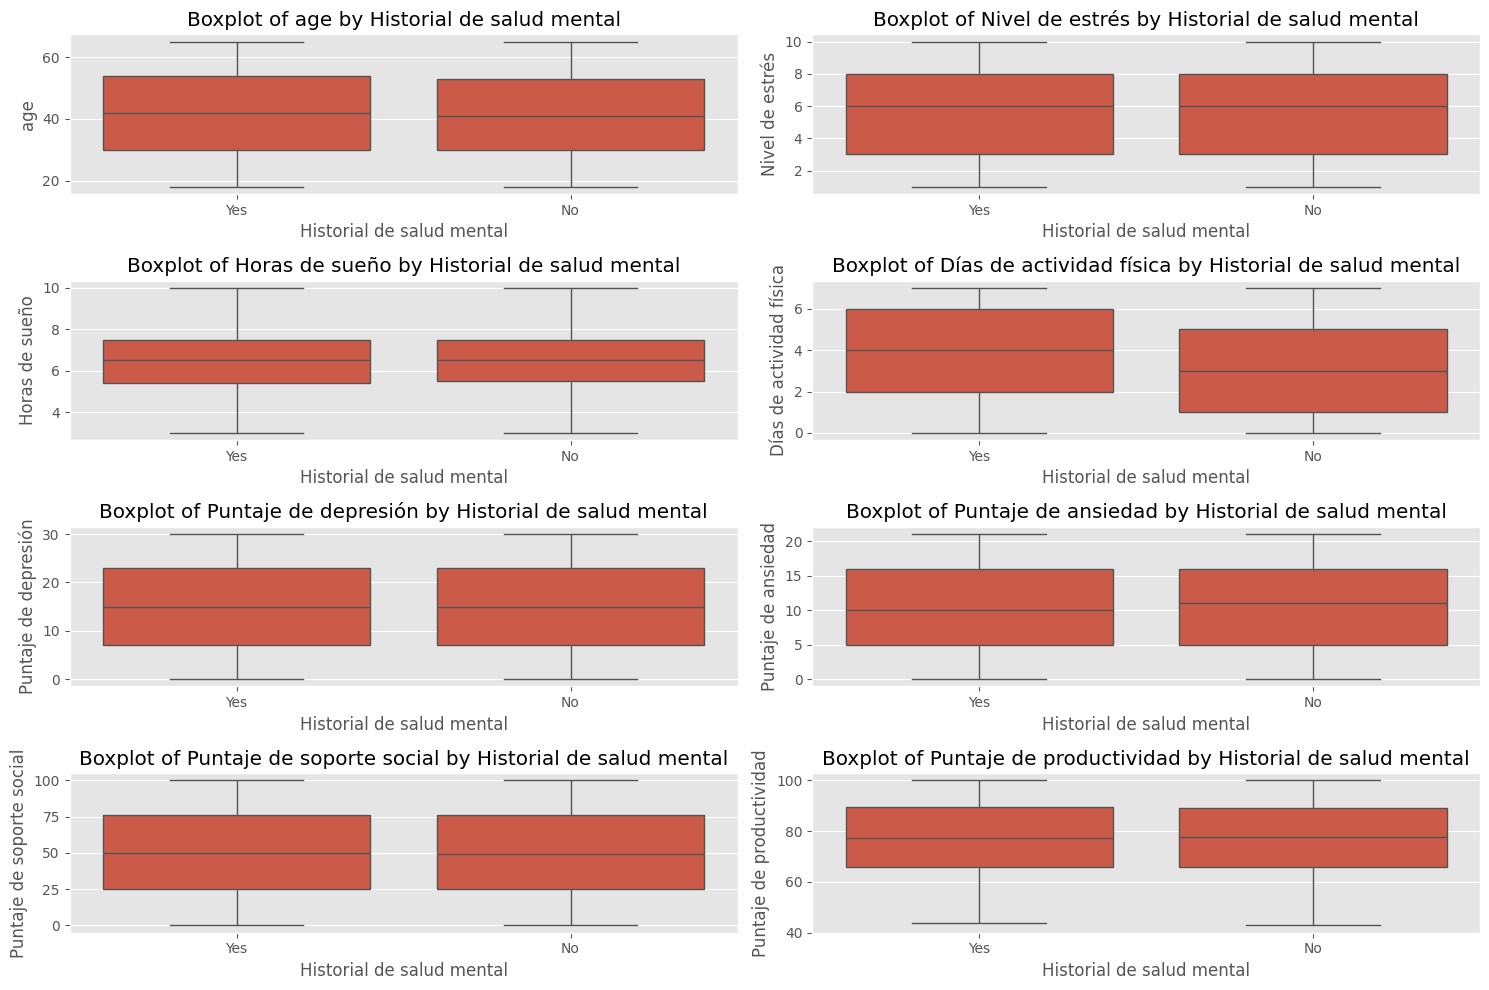

In [33]:
#Diagramas de caja de características numéricas según el riesgo de salud mental
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x='Historial de salud mental', y=col, data=df)
    plt
    plt.title(f'Boxplot of {col} by Historial de salud mental')
    plt.xlabel('Historial de salud mental')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


In [35]:
# balanceo de datos
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd # Import pandas to work with DataFrames

# imputador para reemplazar los valores NaN con la media de la columna
imputer_numeric = SimpleImputer(strategy='mean')
imputer_categorical = SimpleImputer(strategy='most_frequent')

smote=SMOTE(random_state=2024)
X=df.drop(columns="Riesgo para la salud mental")
y=df["Riesgo para la salud mental"]

# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(exclude=np.number).columns

# Reemplace los valores infinitos con NaN para que los imputadores puedan manejarlos
X[numerical_cols] = X[numerical_cols].replace([np.inf, -np.inf], np.nan)
X[categorical_cols] = X[categorical_cols].replace([np.inf, -np.inf], np.nan) # Although unlikely for strings, good practice

# Impute numerical columns
X[numerical_cols] = imputer_numeric.fit_transform(X[numerical_cols])

# Impute categorical columns
X[categorical_cols] = imputer_categorical.fit_transform(X[categorical_cols])


# Now, you can proceed with SMOTE, but remember SMOTE works on numerical data.
# You will likely need to one-hot encode the categorical columns before applying SMOTE.
# For demonstration, I'll show how you would typically one-hot encode after imputation.

X = pd.get_dummies(X, columns=categorical_cols, drop_first=True) # One-hot encode categorical features

# Now X contains only numerical data (original numerical + one-hot encoded categorical)
# It is now ready for SMOTE

X_smote, y_smote = smote.fit_resample(X, y)

# Cuente los datos
print(y_smote.value_counts())

Riesgo para la salud mental
High      5892
Medium    5892
Low       5892
Name: count, dtype: int64


In [37]:
# librerias necesarias para regresion logistica
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [38]:
# Particionar los datos
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=2025)

In [111]:
# implementar el modelo de regresion logistica
rl = LogisticRegression()
rl.fit(X_train, y_train)

LogisticRegression()

In [112]:
# Prediccion
y_pred_rl = rl.predict(X_test)
# Tabla comparativa
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rl})
print(comparison_df)

       Actual Predicted
17038     Low       Low
1896   Medium    Medium
7944   Medium    Medium
6668   Medium    Medium
17066     Low       Low
...       ...       ...
13055    High      High
3771     High      High
6399   Medium    Medium
2667   Medium    Medium
685    Medium    Medium

[3536 rows x 2 columns]


Matriz de confusión:


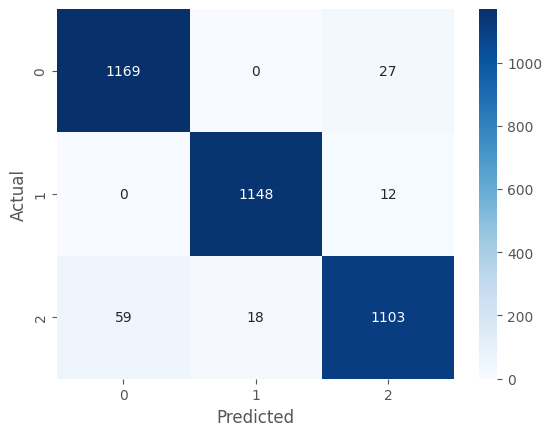

In [113]:
# Matrix de confusion
confusion = confusion_matrix(y_test, y_pred_rl)
print("Matriz de confusión:")
# grafica con sns
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [114]:
# metricas de desempeño del modelo
report = classification_report(y_test, y_pred_rl)
print("Reporte de clasificación:")
print(report)


Reporte de clasificación:
              precision    recall  f1-score   support

        High       0.95      0.98      0.96      1196
         Low       0.98      0.99      0.99      1160
      Medium       0.97      0.93      0.95      1180

    accuracy                           0.97      3536
   macro avg       0.97      0.97      0.97      3536
weighted avg       0.97      0.97      0.97      3536



In [115]:
# variables con mayor importancia del Riesgo para la salud menta
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rl.coef_[0]})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Importancia de características:")
print(feature_importances)

Importancia de características:
                           Feature  Importance
5              Puntaje de ansiedad    1.818650
4             Puntaje de depresión    1.245133
17        Necesita tratamiento_Yes    0.169809
8                      gender_Male    0.161426
12        Estado de empleo_Student    0.100418
15      Ambiente de trabajo_Remote    0.080409
14     Ambiente de trabajo_On-site    0.034025
11  Estado de empleo_Self-employed    0.029043
9                gender_Non-binary    0.022734
16   Historial de salud mental_Yes    0.004677
13     Estado de empleo_Unemployed    0.002541
10        gender_Prefer not to say   -0.000773
6        Puntaje de soporte social   -0.002632
0                              age   -0.010280
1                  Nivel de estrés   -0.074095
3         Días de actividad física   -0.083687
2                   Horas de sueño   -0.321821
7         Puntaje de productividad   -0.388696


Text(0.5, 0, 'Importance')

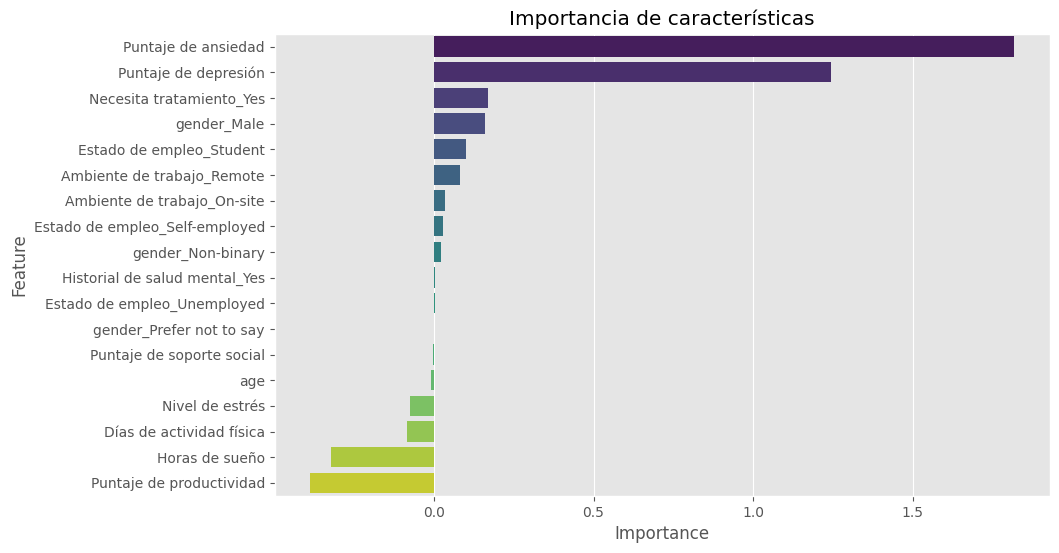

In [116]:
# grafico con las variables mas importantes
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Importancia de características')
plt.xlabel('Importance')

In [98]:
# librerias especificas para arbol de desecion
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [117]:
# implementar el modelo
DT = DecisionTreeClassifier(random_state=2025)
DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2025)

In [118]:
# Prediciones
y_pred_dt = DT.predict(X_test)
# Tabla comparativa
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dt})
print(comparison_df)

       Actual Predicted
17038     Low       Low
1896   Medium    Medium
7944   Medium    Medium
6668   Medium    Medium
17066     Low       Low
...       ...       ...
13055    High      High
3771     High      High
6399   Medium    Medium
2667   Medium    Medium
685    Medium    Medium

[3536 rows x 2 columns]


Matriz de confusión:


Text(50.722222222222214, 0.5, 'Actual')

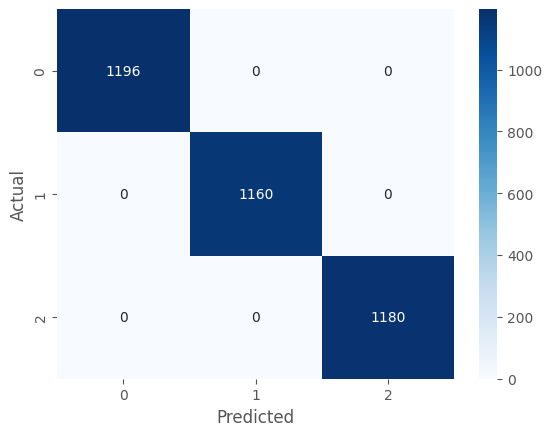

In [119]:
# crear matrix de confusion
confusion = confusion_matrix(y_test, y_pred_dt)
print("Matriz de confusión:")
# grafica con sns
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [120]:
# metricas de desempeño
report = classification_report(y_test, y_pred_dt)
print("Reporte de clasificación:")
print(report)

Reporte de clasificación:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      1196
         Low       1.00      1.00      1.00      1160
      Medium       1.00      1.00      1.00      1180

    accuracy                           1.00      3536
   macro avg       1.00      1.00      1.00      3536
weighted avg       1.00      1.00      1.00      3536



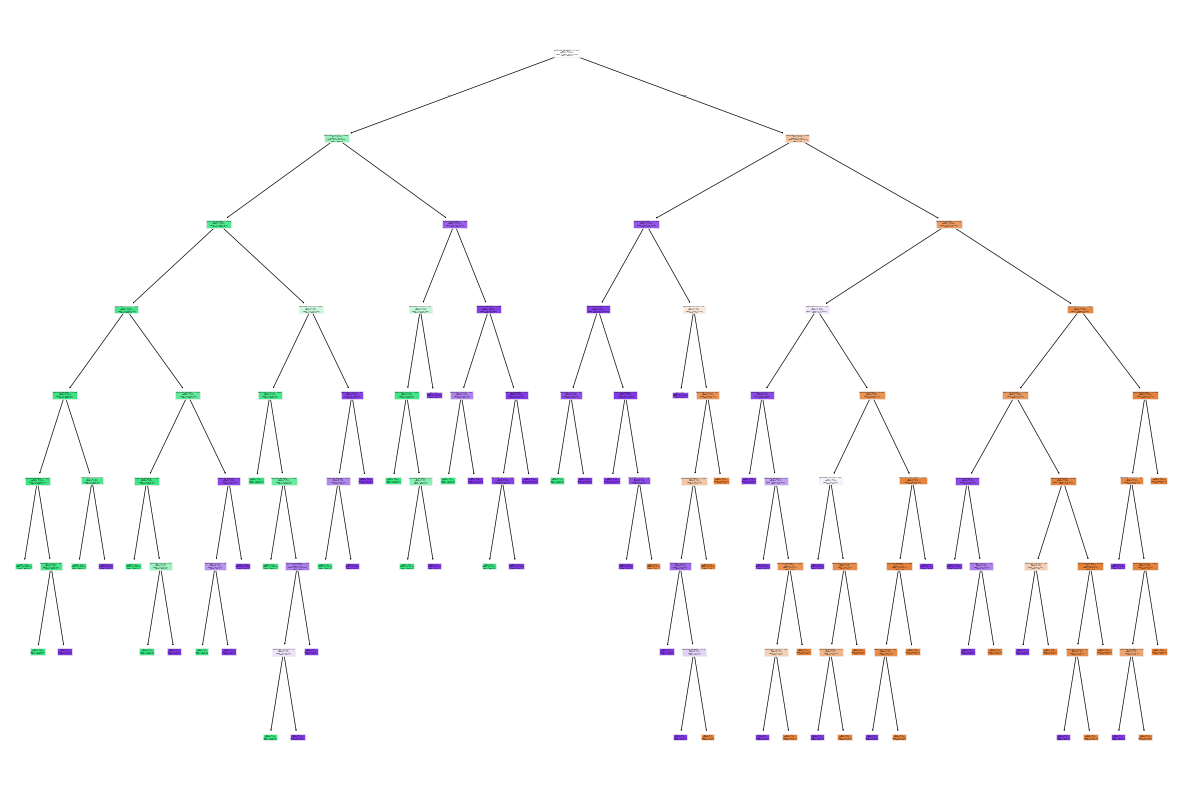

In [122]:
# graficar el arbol
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(DT, filled=True, feature_names=X_train.columns, class_names=['Low', 'Medium', 'High'])
plt.show()



In [123]:
# variables con mayor importancia del Riesgo para la salud mental
# Assign the DataFrame directly to feature_importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': DT.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Importancia de características:")
print(feature_importances)

Importancia de características:
                           Feature  Importance
4             Puntaje de depresión    0.518107
5              Puntaje de ansiedad    0.481485
7         Puntaje de productividad    0.000409
0                              age    0.000000
1                  Nivel de estrés    0.000000
3         Días de actividad física    0.000000
2                   Horas de sueño    0.000000
6        Puntaje de soporte social    0.000000
8                      gender_Male    0.000000
9                gender_Non-binary    0.000000
10        gender_Prefer not to say    0.000000
11  Estado de empleo_Self-employed    0.000000
12        Estado de empleo_Student    0.000000
13     Estado de empleo_Unemployed    0.000000
14     Ambiente de trabajo_On-site    0.000000
15      Ambiente de trabajo_Remote    0.000000
16   Historial de salud mental_Yes    0.000000
17        Necesita tratamiento_Yes    0.000000


Text(0.5, 0, 'Importance')

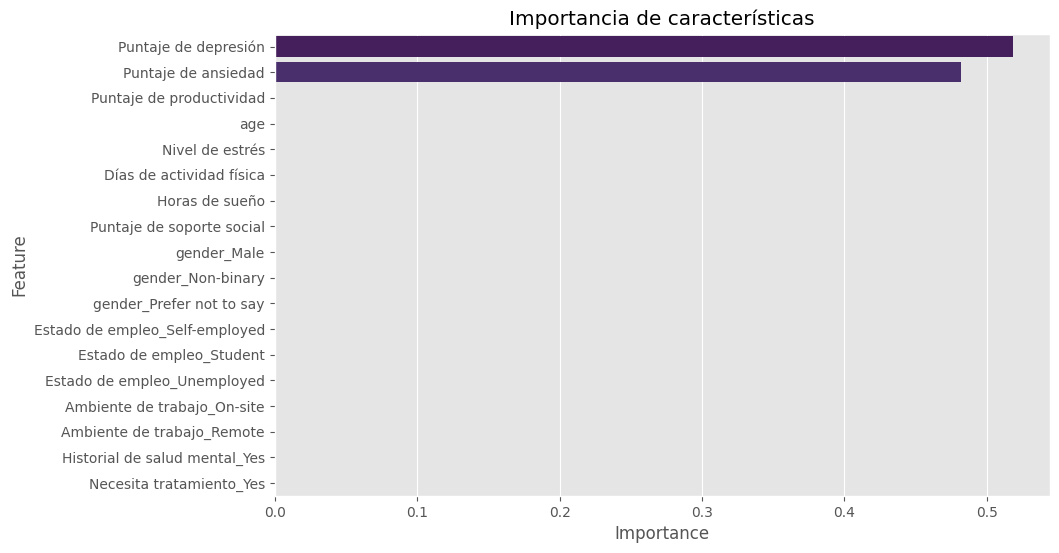

In [124]:
# Grafico con las variables mas importantes
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Importancia de características')
plt.xlabel('Importance')
#

In [106]:
# Implementar un modelo de bosque aleatorio RF
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [125]:
rf=RandomForestClassifier(n_estimators=50,max_depth=3,random_state=2025)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=50, random_state=2025)

In [126]:
# Predicciones
y_pred_rf = rf.predict(X_test)
# Tabla comparativa
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
print(comparison_df)

       Actual Predicted
17038     Low       Low
1896   Medium    Medium
7944   Medium       Low
6668   Medium    Medium
17066     Low       Low
...       ...       ...
13055    High      High
3771     High      High
6399   Medium    Medium
2667   Medium    Medium
685    Medium    Medium

[3536 rows x 2 columns]


In [127]:
# Metricas de desempeño
report = classification_report(y_test, y_pred_rf)
print("Reporte de clasificación:")
print(report)

Reporte de clasificación:
              precision    recall  f1-score   support

        High       0.87      0.97      0.92      1196
         Low       0.82      0.98      0.90      1160
      Medium       0.93      0.64      0.76      1180

    accuracy                           0.87      3536
   macro avg       0.87      0.87      0.86      3536
weighted avg       0.88      0.87      0.86      3536



In [128]:
# comparacion de los modelos por medio de validacion cruzada
from sklearn.model_selection import cross_val_score
accuracy_lr = cross_val_score(rl, X_test, y_test, cv=5)
accuracy_dt = cross_val_score(DT, X_test, y_test, cv=5)
accuracy_rf = cross_val_score(rf, X_test, y_test, cv=5)
print("Accuracy Logistic Regression:", accuracy_lr.mean().round(2))
print("Accuracy Decision Tree:", accuracy_dt.mean().round(2))
print("Accuracy Random Forest:", accuracy_rf.mean().round(2))

Accuracy Logistic Regression: 0.96
Accuracy Decision Tree: 0.99
Accuracy Random Forest: 0.87


In [129]:
# variables mas importantes para predecir el modelo rf
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Importancia de características:")
print(feature_importances)


Importancia de características:
                           Feature  Importance
4             Puntaje de depresión    0.435174
5              Puntaje de ansiedad    0.277962
7         Puntaje de productividad    0.228633
17        Necesita tratamiento_Yes    0.015139
14     Ambiente de trabajo_On-site    0.013535
15      Ambiente de trabajo_Remote    0.008777
8                      gender_Male    0.007858
3         Días de actividad física    0.005267
16   Historial de salud mental_Yes    0.002128
1                  Nivel de estrés    0.001627
12        Estado de empleo_Student    0.001501
9                gender_Non-binary    0.001439
2                   Horas de sueño    0.000280
11  Estado de empleo_Self-employed    0.000211
13     Estado de empleo_Unemployed    0.000202
6        Puntaje de soporte social    0.000152
0                              age    0.000115
10        gender_Prefer not to say    0.000000


Text(0.5, 0, 'Importance')

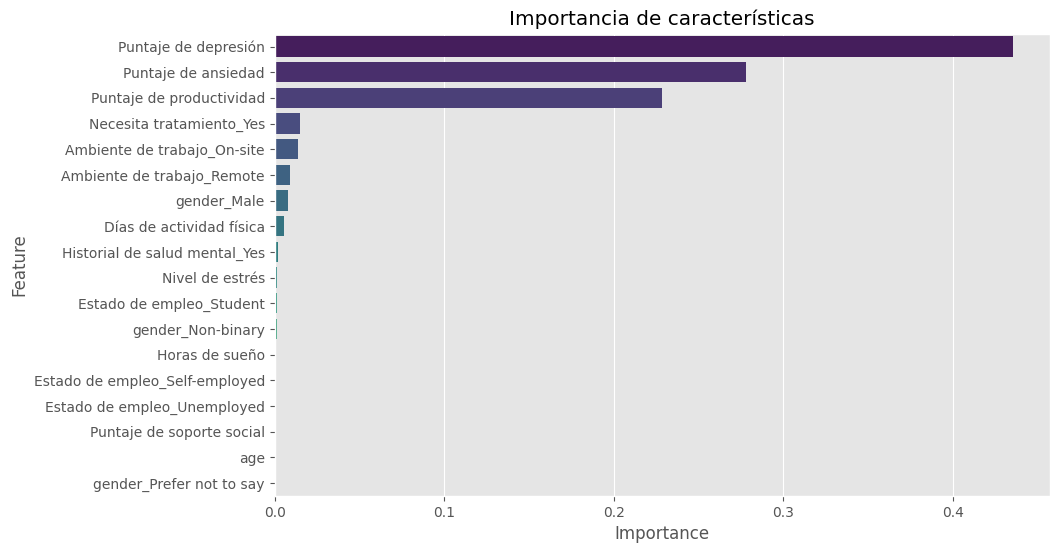

In [130]:
# Grafico de variables relebantes del modelo rf
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Importancia de características')
plt.xlabel('Importance')


In [131]:
# Implementar modelo adaboost
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=50,random_state=2025)
ada.fit(X_train, y_train)


AdaBoostClassifier(random_state=2025)

In [132]:
# Predicciones
y_pred_ada = ada.predict(X_test)
# Tabla comparativa
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ada})
print(comparison_df)


       Actual Predicted
17038     Low       Low
1896   Medium    Medium
7944   Medium    Medium
6668   Medium    Medium
17066     Low    Medium
...       ...       ...
13055    High      High
3771     High      High
6399   Medium    Medium
2667   Medium    Medium
685    Medium    Medium

[3536 rows x 2 columns]


In [133]:
# metricas de desempeño
report = classification_report(y_test, y_pred_ada)
print("Reporte de clasificación:")
print(report)

Reporte de clasificación:
              precision    recall  f1-score   support

        High       0.95      0.94      0.95      1196
         Low       1.00      0.56      0.72      1160
      Medium       0.66      0.95      0.78      1180

    accuracy                           0.82      3536
   macro avg       0.87      0.82      0.82      3536
weighted avg       0.87      0.82      0.82      3536



In [136]:
# variables mas importantes para predecir el modelo ada
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': ada.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Importancia de características:")
print(feature_importances)

Importancia de características:
                           Feature  Importance
4             Puntaje de depresión    0.724756
5              Puntaje de ansiedad    0.256932
7         Puntaje de productividad    0.018312
0                              age    0.000000
1                  Nivel de estrés    0.000000
3         Días de actividad física    0.000000
2                   Horas de sueño    0.000000
6        Puntaje de soporte social    0.000000
8                      gender_Male    0.000000
9                gender_Non-binary    0.000000
10        gender_Prefer not to say    0.000000
11  Estado de empleo_Self-employed    0.000000
12        Estado de empleo_Student    0.000000
13     Estado de empleo_Unemployed    0.000000
14     Ambiente de trabajo_On-site    0.000000
15      Ambiente de trabajo_Remote    0.000000
16   Historial de salud mental_Yes    0.000000
17        Necesita tratamiento_Yes    0.000000


Text(0.5, 0, 'Importance')

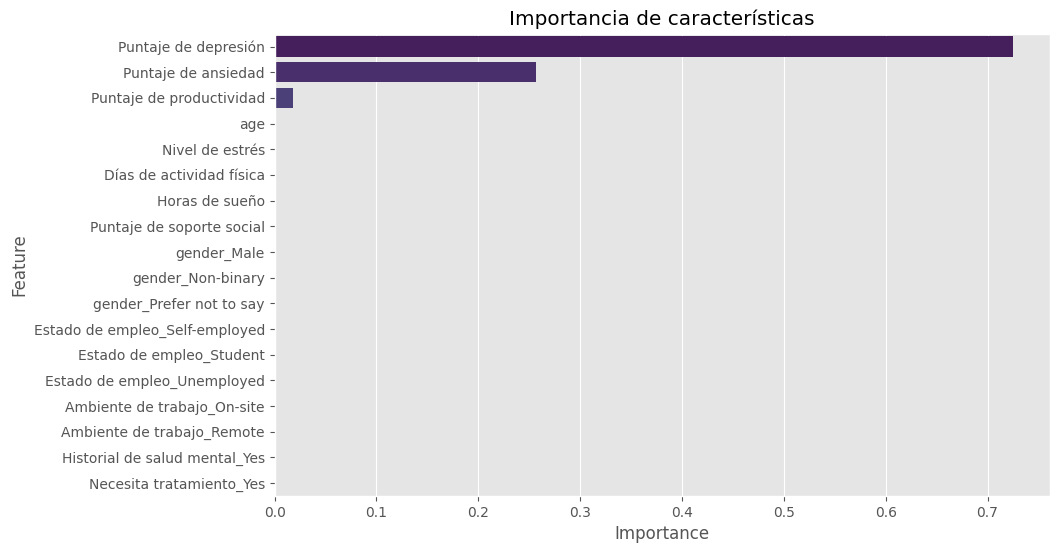

In [137]:
# Grafico de las variables mas importantes
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Importancia de características')
plt.xlabel('Importance')


In [142]:
# implementar modelo xgboost
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Encode target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test) # Use transform on test set to ensure consistent encoding

xgb = XGBClassifier(n_estimators=50, random_state=2025)

# Train the model with encoded target variable
xgb.fit(X_train, y_train_encoded)

# Predecciones using the encoded test set
y_pred_xgb_encoded = xgb.predict(X_test)

# To display the comparison table with original labels, you can inverse transform the predictions
y_pred_xgb = le.inverse_transform(y_pred_xgb_encoded)

# Tabla comparativa
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb})
print(comparison_df)

       Actual Predicted
17038     Low       Low
1896   Medium    Medium
7944   Medium    Medium
6668   Medium    Medium
17066     Low       Low
...       ...       ...
13055    High      High
3771     High      High
6399   Medium    Medium
2667   Medium    Medium
685    Medium    Medium

[3536 rows x 2 columns]


In [144]:
# variables mas relebantes para predecir el modelo xgb
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': xgb.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Importancia de características:")
print(feature_importances)

Importancia de características:
                           Feature  Importance
4             Puntaje de depresión    0.565187
5              Puntaje de ansiedad    0.360828
17        Necesita tratamiento_Yes    0.019782
15      Ambiente de trabajo_Remote    0.018246
14     Ambiente de trabajo_On-site    0.009919
7         Puntaje de productividad    0.004858
12        Estado de empleo_Student    0.002770
16   Historial de salud mental_Yes    0.002457
2                   Horas de sueño    0.002417
13     Estado de empleo_Unemployed    0.002321
3         Días de actividad física    0.002087
9                gender_Non-binary    0.001762
11  Estado de empleo_Self-employed    0.001642
0                              age    0.001574
8                      gender_Male    0.001516
1                  Nivel de estrés    0.001481
6        Puntaje de soporte social    0.001152
10        gender_Prefer not to say    0.000000


Text(0.5, 0, 'Importance')

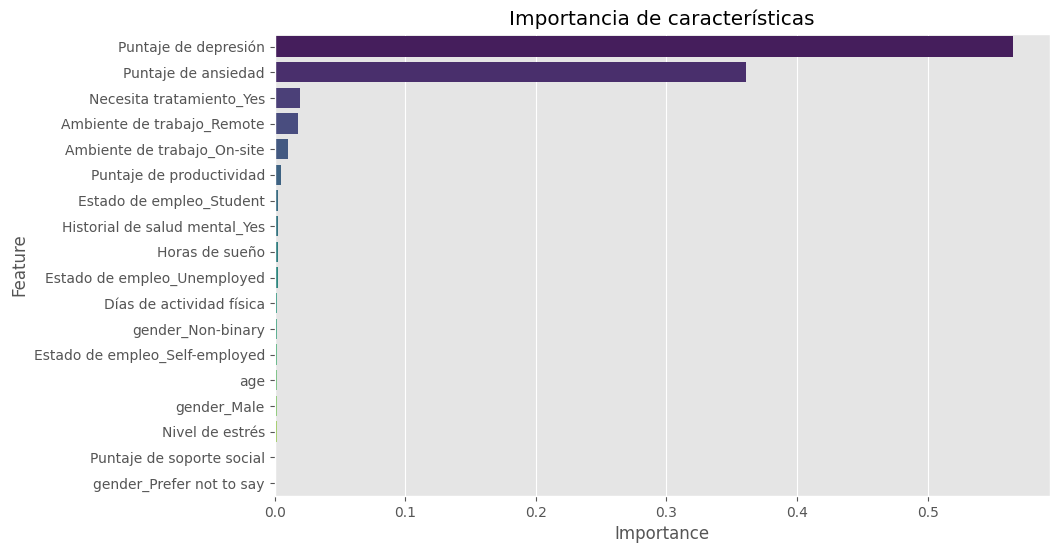

In [145]:
# graficar las variables mas importantes
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Importancia de características')
plt.xlabel('Importance')

#

In [146]:
# metricas de desempeño
report = classification_report(y_test, y_pred_xgb)
print("Reporte de clasificación:")
print(report)

Reporte de clasificación:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      1196
         Low       1.00      1.00      1.00      1160
      Medium       1.00      1.00      1.00      1180

    accuracy                           1.00      3536
   macro avg       1.00      1.00      1.00      3536
weighted avg       1.00      1.00      1.00      3536



In [148]:
# comparacion de los modelos mediante validacion cruzada
from sklearn.model_selection import cross_val_score
accuracy_lr= cross_val_score(rl, X_test, y_test, cv=5,scoring="accuracy")
accuracy_dt= cross_val_score(DT, X_test, y_test, cv=5,scoring="accuracy")
accuracy_rf= cross_val_score(rf, X_test, y_test, cv=5,scoring="accuracy")
accuracy_ada= cross_val_score(ada, X_test, y_test, cv=5,scoring="accuracy")
# Pass the encoded target variable (y_test_encoded) for XGBoost cross-validation
accuracy_xgb= cross_val_score(xgb, X_test, y_test_encoded, cv=5,scoring="accuracy")
print("Accuracy Logistic Regression:", accuracy_lr.mean().round(2))
print("Accuracy Decision Tree:", accuracy_dt.mean().round(2))
print("Accuracy Random Forest:", accuracy_rf.mean().round(2))
print("Accuracy AdaBoost:", accuracy_ada.mean().round(2))
print("Accuracy XGBoost:", accuracy_xgb.mean().round(2))

Accuracy Logistic Regression: 0.96
Accuracy Decision Tree: 0.99
Accuracy Random Forest: 0.87
Accuracy AdaBoost: 0.82
Accuracy XGBoost: 1.0


In [152]:
# crear una tabla comparativa
# Corrected variable names to match the cross-validation results
Tabla = pd.DataFrame({"DT": accuracy_dt.mean().round(2),
                      "RF": accuracy_rf.mean().round(2),
                      "ADA": accuracy_ada.mean().round(2),
                      "XGB": accuracy_xgb.mean().round(2)},
                     index=["Accuracy"]) # Add an index for clarity

# Removed the invalid function call Tablae(data)

# Print the newly created Tabla DataFrame
print(Tabla)

            DT    RF   ADA  XGB
Accuracy  0.99  0.87  0.82  1.0


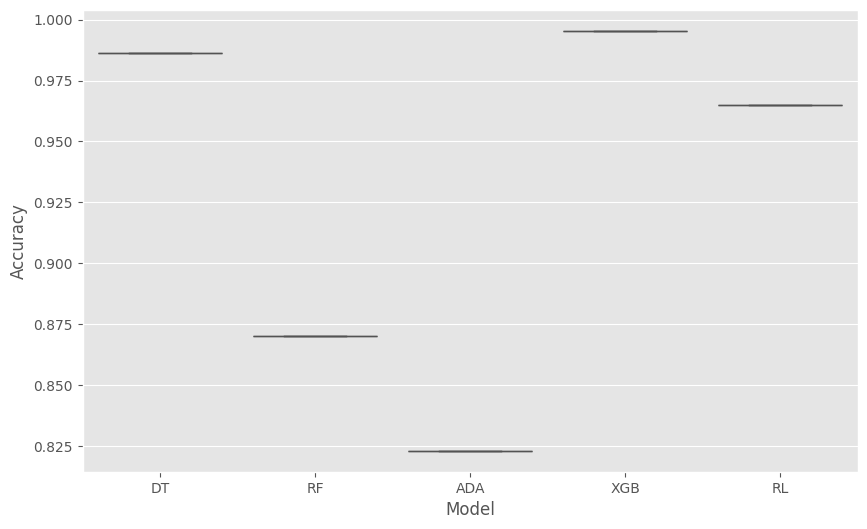

In [157]:
# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Accuracy', data=pd.DataFrame({'Model': ['DT', 'RF', 'ADA', 'XGB',"RL"], 'Accuracy': [accuracy_dt.mean(), accuracy_rf.mean(), accuracy_ada.mean(), accuracy_xgb.mean(), accuracy_lr.mean()]}))
plt.show() # Added plt.show() to display the plot

In [158]:
# ANOVA para la tabla
from scipy.stats import f_oneway
f_statistic, p_value = f_oneway(accuracy_dt, accuracy_rf, accuracy_ada, accuracy_xgb, accuracy_lr)
print("Estadistica:", f_statistic)
print("P-value:", p_value)

Estadistica: 25.79921778785547
P-value: 1.1921962134887448e-07


In [160]:
# importar libreria
from sklearn.metrics import accuracy_score,recall_score,f1_score, roc_auc_score
# metricas: presicion,Recall,F1-score,Roc-Auc
accuracy_lr = accuracy_score(y_test, y_pred_rl)
recall_lr = recall_score(y_test, y_pred_rl, average='weighted')
f1_lr = f1_score(y_test, y_pred_rl, average='weighted')

# Calculate roc_auc_score using predict_proba and the encoded target variable
# Logistic Regression probabilities
y_pred_proba_rl = rl.predict_proba(X_test)
roc_auc_lr = roc_auc_score(y_test_encoded, y_pred_proba_rl, multi_class='ovr')


accuracy_dt = accuracy_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
# Calculate roc_auc_score using predict_proba and the encoded target variable
# Decision Tree probabilities
y_pred_proba_dt = DT.predict_proba(X_test)
roc_auc_dt = roc_auc_score(y_test_encoded, y_pred_proba_dt, multi_class='ovr')


accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
# Calculate roc_auc_score using predict_proba and the encoded target variable
# Random Forest probabilities
y_pred_proba_rf = rf.predict_proba(X_test)
roc_auc_rf = roc_auc_score(y_test_encoded, y_pred_proba_rf, multi_class='ovr')

accuracy_ada = accuracy_score(y_test, y_pred_ada)
recall_ada = recall_score(y_test, y_pred_ada, average='weighted')
f1_ada = f1_score(y_test, y_pred_ada, average='weighted')
# Calculate roc_auc_score using predict_proba and the encoded target variable
# AdaBoost probabilities
y_pred_proba_ada = ada.predict_proba(X_test)
roc_auc_ada = roc_auc_score(y_test_encoded, y_pred_proba_ada, multi_class='ovr')


accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
# The predictions for XGBoost were already in the encoded format, so we can use y_pred_xgb_encoded directly.
# However, roc_auc_score expects probabilities for multi-class.
# Calculate roc_auc_score using predict_proba and the encoded target variable
# XGBoost probabilities
y_pred_proba_xgb = xgb.predict_proba(X_test)
roc_auc_xgb = roc_auc_score(y_test_encoded, y_pred_proba_xgb, multi_class='ovr')

In [162]:
# crear tabla comparativa
Tabla = pd.DataFrame({"DT": [accuracy_dt, recall_dt, f1_dt, roc_auc_dt],
                      "RF": [accuracy_rf, recall_rf, f1_rf, roc_auc_rf],
                      "RL": [accuracy_lr, recall_lr, f1_lr, roc_auc_lr],
                      "ADA": [accuracy_ada, recall_ada, f1_ada, roc_auc_ada],
                      "XGB": [accuracy_xgb, recall_xgb, f1_xgb, roc_auc_xgb]},
                     index=["Accuracy", "Recall", "F1-Score", "ROC-AUC"])
Tabla

,DT,RF,RL,ADA,XGB
Accuracy,1.0,0.865667,0.967195,0.820701,1.0
Recall,1.0,0.865667,0.967195,0.820701,1.0
F1-Score,1.0,0.858400,0.967098,0.816551,1.0
ROC-AUC,1.0,0.977929,0.997776,0.911161,1.0
